# Dinamica Molecolare (aggiustamenti)

Un codice di Dinamica Molecolare (MD) è un algoritmo simulativo di interazione molecolare basato su alcuni punti e concetti chiave:
- teoria degli insiemi;
- sistemi micro-meccanici;
- algoritmo di Verlert (integrando le equazioni di moto classico newtoniano);
- condizioni al contorno periodiche;
- potenziale di interazione di Lennard-Jones;

Sistemare, quindi, il codice fornito così da fornire una partenza adeguata alla simulazione e non casuale (la quale causa uno scompenso iniziale al sistema che autonomamente pian piano si riequilibra sottraendo tuttavia tempo all'effettiva evoluzione) applicato ad un sistema termodinamico descritto dall'interazione L-J.

#### - Esecuzione degli aggiornamenti
1. Chiedere l'esecuzione del programma due volte per:\
    a) preparare una partenza coerente grazie all'algoritmo già in possesso (simulazione di lunghezza ridotta $\sim$ 2000 steps);\
    b) eseguire la simulazione a partire da 2 configurazioni successive ottenute dalla preparazione, a seguito di una corretta ed adeguata termalizzazione;
2. Tener traccia di due configurazioni finali $\vec{r}(t)$ e $\vec{r}(t-dt)$;
3. Calcolare (per la simulazione effettiva) la velocità iniziale secondo l'algoritmo di Verlet\
    $$ \vec{v}_{(t+\frac{dt}{2})} \ =  \ \frac{\vec{r}_{(t)}-\vec{r}_{(t-dt)}}{2dt} $$
   quindi eventualmente riscalare tale velocità alla T di simulazione adeguata qualora essa sia variata eccessivamente nelle fasi precedenti alla simulazione.
4. Ricalcolare (per la simulazione effettiva) la configurazione $\vec{\tilde{r}_{(t)}}$ secondo la velocità riscalata $\vec{\tilde{v}_{(t+\frac{dt}{2})}}$:
    $$\vec{\tilde{r}}_{(t)} = \vec{r}_{(t+dt)} - \vec{\tilde{v}} dt$$

#### - Osservazione del risultato degli aggiornamenti e del funzionamento dell'algoritmo di MD
Si importino alcuni dati relativi alla simulazione termodinamica.\
Essi sono espressi in unità di L-J secondo il potenziale di interazione scelto. Tale scelta generalizza il sistema.

In particolare si osservino:
- l'energia cinetica media di ogni particella;
- l'energia potenziale media di ogni particella;
- l'energia totale media di ogni particella;
- la temperatura media di ogni particella;

In [1]:

import numpy


K, P, Etot, Temp= numpy.loadtxt( "4.1/out.txt", usecols= (0,1,2,3), delimiter= "\t", unpack= 'true' )


Per necessità si definisce la seguente funzione:

In [2]:

import math


def Media (X, n) :              #attenzione: n è la posizione nell'array
    return sum( X[:n+1] )/(n+1)


Si osservino gli andamenti delle tre energie nelle unità di L-J, a seguito di una simulazione di 3000 steps:

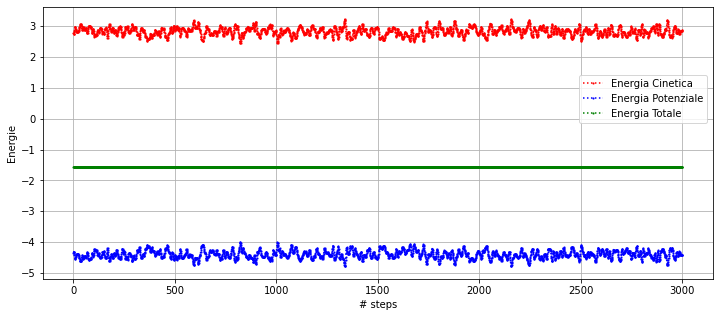

In [3]:

import matplotlib.pyplot as plt

N = numpy.arange ( numpy.size(K) )   

plt.figure(figsize=(12, 5))
plt.plot( N, K, marker= 's', mfc= 'red', mec= 'red', ms= 1, linestyle= ":",
          color= "red", label= "Energia Cinetica")
plt.plot( N, P, marker= 's', mfc= 'blue', mec= 'blue', ms= 1, linestyle= ":",
          color= "blue", label= "Energia Potenziale")
plt.plot( N, Etot, marker= 's', mfc= 'green', mec= 'green', ms= 1, linestyle= ":",
          color= "green", label= "Energia Totale")
plt.xlabel('# steps')
plt.ylabel('Energie')
plt.title('')
plt.grid(True)
plt.legend(bbox_to_anchor=(0.8, 0.75), loc='upper left', borderaxespad=0.)

plt.show()


In particolare si può notare come l'energia totale del sistema compie variazioni minime rispetto alle altre energie graficate.
Inoltre non esiste un grosso scompenso iniziale dovuto ad una partenza casuale per via delle correzioni al codice apportate.

Resta da stimare in qualche maniera un errore legato a queste osservabili, per stabilire se queste fluttuazioni seppur minime siano statistiche oppure legate ad aspetti della simulazione che andrebbero controllati in maniera migliore.

Si valutino ora uno alla volta i singoli andamenti delle energie riportate nel grafico precedente.

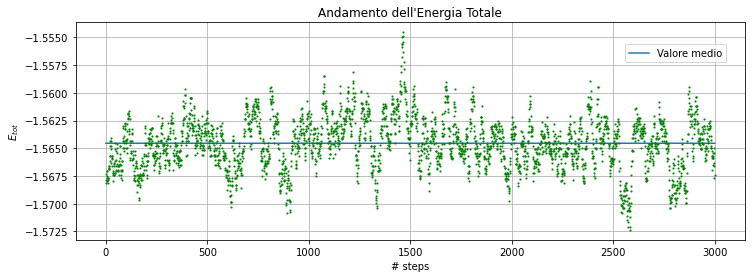

In [4]:

plt.figure(figsize=(12, 4))
plt.plot ( Media(Etot,numpy.size(Etot)-1)+numpy.zeros(3000), label= "Valore medio")
plt.plot( N, Etot, marker= 's', mfc= 'green', mec= 'green', ms= 1, linestyle= "none", color="green")
plt.xlabel('# steps')
plt.ylabel(r'$E_{tot}$')
plt.title("Andamento dell'Energia Totale")
plt.grid(True)
plt.legend(bbox_to_anchor=(0.82, 0.9), loc='upper left', borderaxespad=0.)

plt.show()


Le fluttuazioni di energia totale equivalentemente sopra e sotto il valor medio indicano anzitutto che la stima del valor medio ha effettivamente un senso e rappresenta quantomeno una parte delle misure effettuate, inoltre la disposizione delle stesse ricorda l'andamento di quelle statistiche; tuttavia è fondamentale stimare un errore associato al valor medio per meglio comprendere l'origine di queste discrepanze.

Si osservi, ora, l'andamento della temperatura; in particolare il suo legame istante per istante della simulazione con l'energia cinetica.\
Anche a prima vista si può notare come le due grandezze siano proporzionali, addirittura multiple tra loro.\
Si dimostra infatti che: $\tilde{T} = \frac{2}{3}\tilde{K}$.

Si produce un grafico per meglio visualizzare quanto affermato.

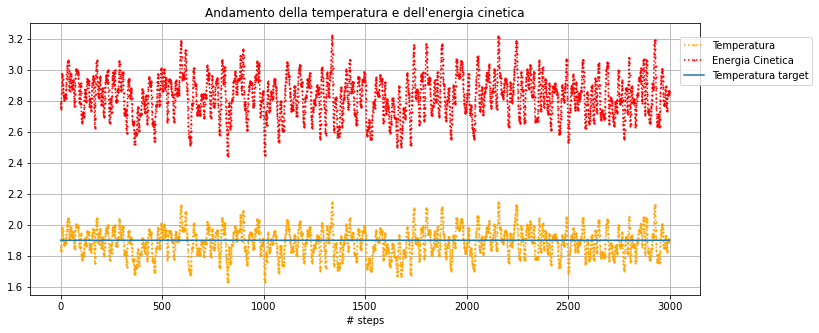

In [5]:

plt.figure(figsize=(12, 5))
plt.plot( N, Temp, marker= 's', mfc= 'orange', mec= 'orange', ms= 1, linestyle= ":", 
          color= "orange", label= "Temperatura")
plt.plot( N, K, marker= 's', mfc= 'orange', mec= 'red', ms= 1, linestyle= ":",
          color= "red", label= "Energia Cinetica")
plt.plot ( 1.9+numpy.zeros(3000), label= "Temperatura target")
plt.xlabel('# steps')
plt.ylabel('')
plt.title("Andamento della temperatura e dell'energia cinetica")
plt.grid(True)
plt.legend(bbox_to_anchor=(.97, .95), loc='upper left', borderaxespad=0.)

plt.show()


Come pare facilmente osservabile i due profili graficati presentano un andamento proporzionale, e qualora si volesse verificare la relazione precedentemente fornita è possibile modificare il grafico fornito inserendo il fattore di scala indicato.

Si è inserito nel grafico, inoltre, un riferimento alla temperatura target alla quale si desidera effettuare la simulazione. Dal confronto con il profilo della temperatura si può evincere come abbia funzionato il processo di creazione di una partenza adeguata ed il riscalamento della temperatura alla temperatura desiderata. Le fluttuazione, come in precedenza sono, tuttavia, ancora da valutare qualora si trovi una modalità di stima dell'errore da associare al valor medio nella simulazione dell'osservabile temperatura.

Si rammenta, infine, che tutte le unità riportate nei grafici sono unità di L-J al fine di dare generalità al sistema simulato.

### -----------------------------------------------------------------------------------------------------------------------------------------------------------

# Dinamica Molecolare - Stima degli errori

L'algoritmo di Dinamica Molecolare precedentemente modificato applicato ad un caso di un sistema termodinamico è ora in grado di restituire alcune variabili termodinamiche di interesse ad ogni passo (discreto) della simulazione.\
Non è tuttavia in grado di stimare incertezze.

Si applichino quindi algoritmi statistici (in particolare le medie di gruppo o medie a blocchi) per determinare le incertezze sulle quattro osservabili di interesse.


#### - Esecuzione:
Si costruisce la seguente funzione per la stima degli errori (deviazioni standard della media) nell'algoritmo delle medie di gruppo:

In [6]:

def Err (X, n):             #attenzione n è la posizione nell'array, vale N=(n+1) ovvero (N-1)=n
    if n==0 :
        return 0
    return math.sqrt( (Media(X**2, n) - Media(X, n)**2) / n )


Si importano i blocchi delle quattro osservabili di interesse (in unità di L-J), ottenuti modificando il codice di esecuzione della simulazione così da dividere gli steps discreti della simulazione in 100 blocchi.

In [7]:

K, P, Etot, Temp= numpy.loadtxt( "4.2/ave_out.txt", usecols= (0,1,2,3), delimiter= "\t", unpack= 'true' )


Si produce un grafico dell'andamento all'aumentare nel numero di blocchi utilizzati del valor medio delle osservabili e dell'errore associato (sotto forma di deviazione standard della media).

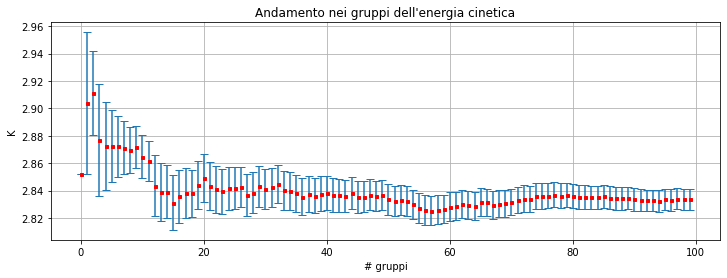

Energia Cinetica
- valore medio: 2.83
- errore:       0.01


In [8]:

AvK= numpy.zeros( numpy.size(K) )
dev_AvK= numpy.zeros( numpy.size(K) )

for i in range( numpy.size(K) ):
    AvK[i]= Media (K, i)
    dev_AvK[i]= Err (K, i)
    
N = numpy.arange ( numpy.size(AvK) )   

plt.figure(figsize=(12, 4))
plt.errorbar( N, AvK, yerr= dev_AvK, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3, linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel('K')
plt.title("Andamento nei gruppi dell'energia cinetica")
plt.grid(True)

plt.show()

print("Energia Cinetica")
print("- valore medio:", round(AvK[numpy.size(AvK)-1],2))
print("- errore:      ", round(dev_AvK[numpy.size(AvK)-1],2))


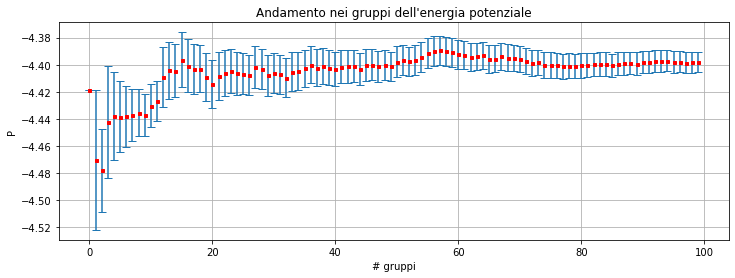

Energia Potenziale
- valore medio: -4.4
- errore:       0.01


In [9]:

AvP= numpy.zeros( numpy.size(P) )
dev_AvP= numpy.zeros( numpy.size(P) )

for i in range( numpy.size(P) ):
    AvP[i]= Media (P, i)
    dev_AvP[i]= Err (P, i)

plt.figure(figsize=(12, 4))
plt.errorbar( N, AvP, yerr= dev_AvP, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3, linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel('P')
plt.title("Andamento nei gruppi dell'energia potenziale")
plt.grid(True)

plt.show()

print("Energia Potenziale")
print("- valore medio:", round(AvP[numpy.size(AvP)-1],2))
print("- errore:      ", round(dev_AvP[numpy.size(AvP)-1],2))


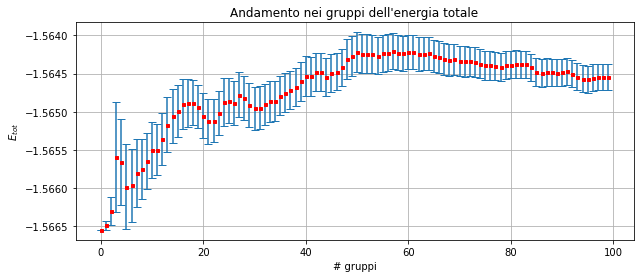

Energia Totale
- valore medio: -1.56455
- errore:       0.00017


In [10]:

AvEtot= numpy.zeros( numpy.size(Etot) )
dev_AvEtot= numpy.zeros( numpy.size(Etot) )

for i in range( numpy.size(Etot) ):
    AvEtot[i]= Media (Etot, i)
    dev_AvEtot[i]= Err (Etot, i)

plt.figure(figsize=(10, 4))
plt.errorbar( N, AvEtot, yerr= dev_AvEtot, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3,  
              linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel('$E_{tot}$')
plt.title("Andamento nei gruppi dell'energia totale")
plt.grid(True)

plt.show()

print("Energia Totale")
print("- valore medio:", round(AvEtot[numpy.size(AvEtot)-1],5))
print("- errore:      ", round(dev_AvEtot[numpy.size(AvEtot)-1],5))


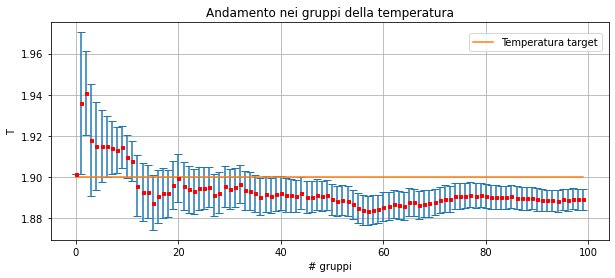

Temperatura
- valore medio: 1.8891
- errore:       0.005


In [11]:

AvTemp= numpy.zeros( numpy.size(Temp) )
dev_AvTemp= numpy.zeros( numpy.size(Temp) )

for i in range( numpy.size(Temp) ):
    AvTemp[i]= Media (Temp, i)
    dev_AvTemp[i]= Err (Temp, i)  

plt.figure(figsize=(10, 4))
plt.errorbar( N, AvTemp, yerr= dev_AvTemp, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3, 
              linestyle= "none")
plt.plot ( 1.9+numpy.zeros(100), label= "Temperatura target")
plt.xlabel('# gruppi')
plt.ylabel('T')
plt.title('Andamento nei gruppi della temperatura')
plt.legend(bbox_to_anchor=(.75, .95), loc='upper left', borderaxespad=0.)
plt.grid(True)

plt.show()

print("Temperatura")
print("- valore medio:", round(AvTemp[numpy.size(AvTemp)-1],4))
print("- errore:      ", round(dev_AvTemp[numpy.size(AvTemp)-1],4))


Tutti gli andamenti graficati presentano errori decrescenti nel numero di gruppi considerati, e gli andamenti convergono, con diversi gradi di accuratezza ad un valore stabile.

Il grafico sulla scala più stretta è quello dell'Energia Totale, a dare valore all'ipotesi che tale osservabile (sulle scale delle altre) si conservi al netto di fluttuazioni esclusivamente statistiche.

Si produce, infine, un grafico riassuntivo di tutte le grandezze considerate con relativi errori calcolati mediante algoritmo statistico di media a blocchi, in unità di L-J, per una visualizzazione globale della simulazione.

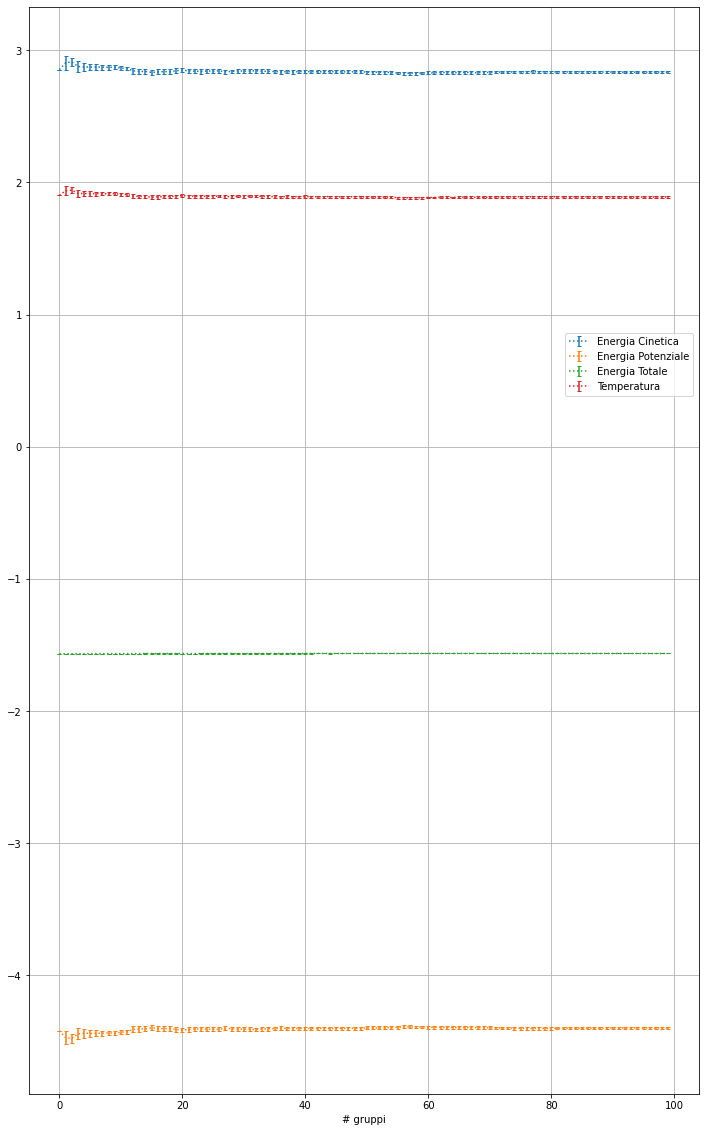

In [12]:

plt.figure(figsize=(12, 20))
plt.errorbar( N, AvK, yerr= dev_AvK, capsize= 2, marker= 's', mfc= 'red', mec= 'red', ms= 0, 
              linestyle= ":", label= "Energia Cinetica")
plt.errorbar( N, AvP, yerr= dev_AvP, capsize= 2, marker= 's', mfc= 'blue', mec= 'blue', ms= 0, 
             linestyle= ":", label= "Energia Potenziale")
plt.errorbar( N, AvEtot, yerr= dev_AvEtot, capsize= 2, marker= 's', mfc= 'green', mec= 'green', ms= 0, 
              linestyle= ":", label= "Energia Totale")
plt.errorbar( N, AvTemp, yerr= dev_AvTemp, capsize= 2, marker= 's', mfc= 'orange', mec= 'orange', ms= 0, 
              linestyle= ":", label= "Temperatura")
plt.xlabel('# gruppi')
plt.ylabel('')
plt.title('')
plt.grid(True)
plt.legend(bbox_to_anchor=(.8,.7), loc='upper left', borderaxespad=0.)

plt.show()



Il grafico sopra riportato è poco significativo sulla scala di L-J visualizzata, tuttavia si possono notare alcune peculiarità qualitative:
- su questa scala si possono notare degli andamenti non rettilinei per ogni osservabile tranne per l'Energia Totale, avvalorando l'ipotesi che tale osservabile si conservi;
- i profili di Energia Cinetica e Temperatura presentano andamenti estremamente simili come per altro evidenziato in precedenza;
- l'Energia Potenziale ha un andamento inverso rispetto a quello dell'Energia Cinetica il che è fonte dei comportamenti precedentemente osservati;

### -----------------------------------------------------------------------------------------------------------------------------------------------------------

# Dinamica Molecolare - Simulazione nei tre stati fisici dell'Argon

Con il codice opportunamente modificato in precedenza, eseguire nei tre stati di aggregazione (liquido, solido e gassoso) una simulazione con dell'Argon.

1. fase solida: $\rho^\star$ = 1.1, $T^\star$ = 0.8, $r_{cut}$ = 2.2
2. fase liquida: $\rho^\star$ = 0.8, $T^\star$ = 1.1, $r_{cut}$ = 2.5
3. fase gassosa: $\rho^\star$ = 0.05, $T^\star$ = 1.2, $r_{cut}$ = 5

Esprimere i risulati in unità di misura dell'SI e non più quelle generalizzate di L-J.

#### - Esecuzione:

Si modifica anzitutto l'algoritmo di esecuzione affinchè la preparazione delle condizioni iniziali duri a sufficienza per costruire, oltre ad una partenza, una configuarazione tipica dello stato in considerazione, avendo a disposizione da principio una disposizione totalmente casuale (processo di termalizzazione).

##### stato solido:
Si importano i blocchi riguardanti la simulazione dell'Argon in stato solido.
Inoltre si convertono tali risultati in unità dell'SI tramite le costanti ridotte di L-J.\
($\sigma$ = 0.34nm, $\epsilon/k_B $= 120K, $m$ = 39.948amu)

In [13]:

from scipy.constants import Boltzmann

K_sol, P_sol, Etot_sol, Temp_sol= numpy.loadtxt( "4.3 (Argon)/ave_solid_out.txt", usecols= (0,1,2,3),
                                                 delimiter= "\t", unpack= 'true' )

sigma= 0.34*(10**9)
e_k= 120
e= e_k/Boltzmann
m= 39.948

Temp_sol= Temp_sol*e_k
K_sol= K_sol*e
P_sol= P_sol*e
Etot_sol= Etot_sol*e


Si produce un grafico dell'andamento all'aumentare del numero di blocchi utilizzati del valor medio delle osservabili e dell'errore associato (sotto forma di deviazione standard della media).

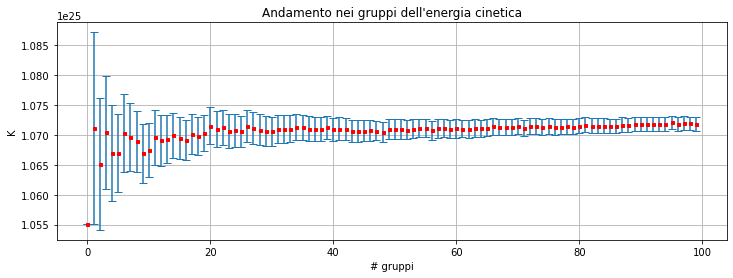

Energia Cinetica
- valore medio: 1.0718275477692007e+25
- errore:       1.1448142953184408e+22


In [14]:

AvK_sol= numpy.zeros( numpy.size(K_sol) )
dev_AvK_sol= numpy.zeros( numpy.size(K_sol) )

for i in range( numpy.size(K_sol) ):
    AvK_sol[i]= Media (K_sol, i)
    dev_AvK_sol[i]= Err (K_sol, i)
    
N = numpy.arange ( numpy.size(AvK_sol) )   

plt.figure(figsize=(12, 4))
plt.errorbar( N, AvK_sol, yerr= dev_AvK_sol, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3, 
              linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel('K')
plt.title("Andamento nei gruppi dell'energia cinetica")
plt.grid(True)

plt.show()

print("Energia Cinetica")
print("- valore medio:", AvK_sol[numpy.size(AvK_sol)-1])
print("- errore:      ", dev_AvK_sol[numpy.size(AvK_sol)-1])


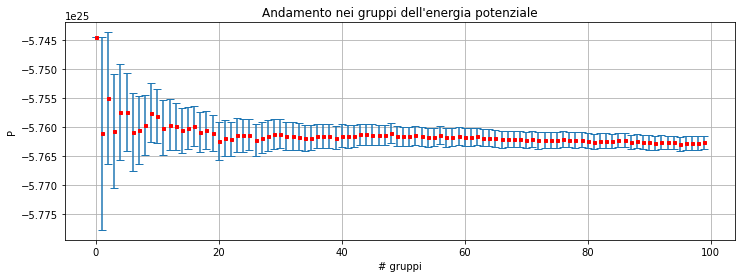

Energia Potenziale
- valore medio: -5.762668492860967e+25
- errore:       1.1672895470692483e+22


In [15]:

AvP_sol= numpy.zeros( numpy.size(P_sol) )
dev_AvP_sol= numpy.zeros( numpy.size(P_sol) )

for i in range( numpy.size(P_sol) ):
    AvP_sol[i]= Media (P_sol, i)
    dev_AvP_sol[i]= Err (P_sol, i)

plt.figure(figsize=(12, 4))
plt.errorbar( N, AvP_sol, yerr= dev_AvP_sol, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3, 
              linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel('P')
plt.title("Andamento nei gruppi dell'energia potenziale")
plt.grid(True)

plt.show()

print("Energia Potenziale")
print("- valore medio:", AvP_sol[numpy.size(AvP_sol)-1])
print("- errore:      ", dev_AvP_sol[numpy.size(AvP_sol)-1])


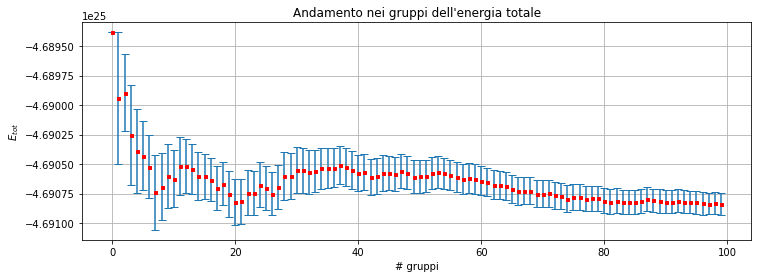

Energia Totale
- valore medio: -4.6908409885495886e+25
- errore:       9.173109712599372e+20


In [16]:

AvEtot_sol= numpy.zeros( numpy.size(Etot_sol) )
dev_AvEtot_sol= numpy.zeros( numpy.size(Etot_sol) )

for i in range( numpy.size(Etot_sol) ):
    AvEtot_sol[i]= Media (Etot_sol, i)
    dev_AvEtot_sol[i]= Err (Etot_sol, i)

plt.figure(figsize=(12, 4))
plt.errorbar( N, AvEtot_sol, yerr= dev_AvEtot_sol, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3,  
              linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel('$E_{tot}$')
plt.title("Andamento nei gruppi dell'energia totale")
plt.grid(True)

plt.show()

print("Energia Totale")
print("- valore medio:", AvEtot_sol[numpy.size(AvEtot_sol)-1])
print("- errore:      ", dev_AvEtot_sol[numpy.size(AvEtot_sol)-1])


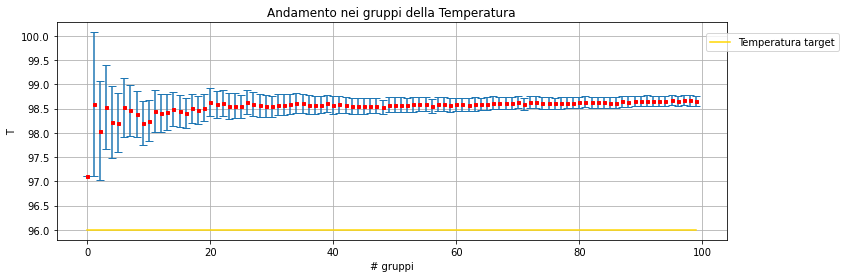

Temperatura
- valore medio: 98.65
- errore:       0.11


In [17]:

AvTemp_sol= numpy.zeros( numpy.size(Temp_sol) )
dev_AvTemp_sol= numpy.zeros( numpy.size(Temp_sol) )

for i in range( numpy.size(Temp_sol) ):
    AvTemp_sol[i]= Media (Temp_sol, i)
    dev_AvTemp_sol[i]= Err (Temp_sol, i)  

plt.figure(figsize=(12, 4))
plt.plot ( 0.8*e_k+numpy.zeros(100), label= "Temperatura target", color= "gold")
plt.errorbar( N, AvTemp_sol, yerr= dev_AvTemp_sol, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3, 
              linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel('T')
plt.title("Andamento nei gruppi della Temperatura")
plt.grid(True)
plt.legend(bbox_to_anchor=(.97, .95), loc='upper left', borderaxespad=0.)

plt.show()

print("Temperatura")
print("- valore medio:", round(AvTemp_sol[numpy.size(AvTemp_sol)-1],2))
print("- errore:      ", round(dev_AvTemp_sol[numpy.size(AvTemp_sol)-1],2))


##### stato liquido:
Si importano i blocchi riguardanti la simulazione dell'Argon in stato liquido e si convertono le grandezze in unità dell'SI.

In [18]:

K_liq, P_liq, Etot_liq, Temp_liq= numpy.loadtxt( "4.3 (Argon)/ave_liquid_out.txt", usecols= (0,1,2,3), 
                                                 delimiter= "\t", unpack= 'true' )

Temp_liq= Temp_liq*e_k
K_liq= K_liq*e
P_liq= P_liq*e
Etot_liq= Etot_liq*e


Si produce un grafico dell'andamento all'aumentare del numero di blocchi utilizzati del valor medio delle osservabili e dell'errore associato (sotto forma di deviazione standard della media).

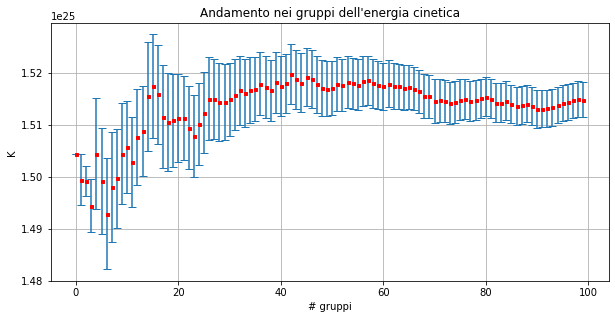

Energia Cinetica
- valore medio: 1.5148185353409878e+25
- errore:       3.3856878012100134e+22


In [19]:

AvK_liq= numpy.zeros( numpy.size(K_liq) )
dev_AvK_liq= numpy.zeros( numpy.size(K_liq) )

for i in range( numpy.size(K_liq) ):
    AvK_liq[i]= Media (K_liq, i)
    dev_AvK_liq[i]= Err (K_liq, i)
    
N = numpy.arange ( numpy.size(AvK_liq) )   

plt.figure(figsize=(10, 4.75))
plt.errorbar( N, AvK_liq, yerr= dev_AvK_liq, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3, 
              linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel('K')
plt.title("Andamento nei gruppi dell'energia cinetica")
plt.grid(True)

plt.show()

print("Energia Cinetica")
print("- valore medio:", AvK_liq[numpy.size(AvK_liq)-1])
print("- errore:      ", dev_AvK_liq[numpy.size(AvK_liq)-1])


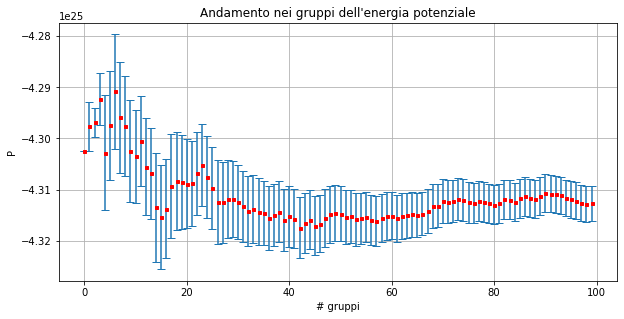

Energia Potenziale
- valore medio: -4.312700728425543e+25
- errore:       3.441110270945702e+22


In [20]:

AvP_liq= numpy.zeros( numpy.size(P_liq) )
dev_AvP_liq= numpy.zeros( numpy.size(P_liq) )

for i in range( numpy.size(P_liq) ):
    AvP_liq[i]= Media (P_liq, i)
    dev_AvP_liq[i]= Err (P_liq, i)

plt.figure(figsize=(10, 4.75))
plt.errorbar( N, AvP_liq, yerr= dev_AvP_liq, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3,
              linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel('P')
plt.title("Andamento nei gruppi dell'energia potenziale")
plt.grid(True)

plt.show()

print("Energia Potenziale")
print("- valore medio:", AvP_liq[numpy.size(AvP_liq)-1])
print("- errore:      ", dev_AvP_liq[numpy.size(AvP_liq)-1])


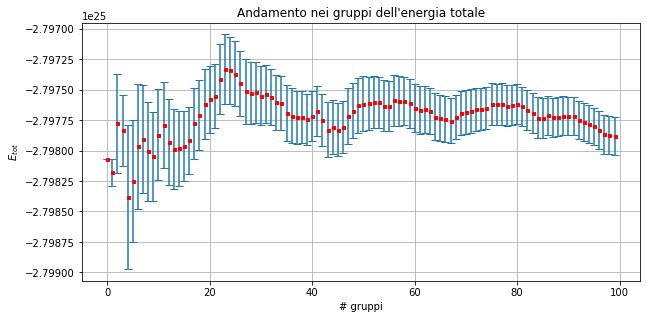

Energia Totale
- valore medio: -2.797882210467686e+25
- errore:       1.558198233574191e+21


In [21]:

AvEtot_liq= numpy.zeros( numpy.size(Etot_liq) )
dev_AvEtot_liq= numpy.zeros( numpy.size(Etot_liq) )

for i in range( numpy.size(Etot_liq) ):
    AvEtot_liq[i]= Media (Etot_liq, i)
    dev_AvEtot_liq[i]= Err (Etot_liq, i)

plt.figure(figsize=(10, 4.75))
plt.errorbar( N, AvEtot_liq, yerr= dev_AvEtot_liq, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3,  
              linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel('$E_{tot}$')
plt.title("Andamento nei gruppi dell'energia totale")
plt.grid(True)

plt.show()

print("Energia Totale")
print("- valore medio:", AvEtot_liq[numpy.size(AvEtot_liq)-1])
print("- errore:      ", dev_AvEtot_liq[numpy.size(AvEtot_liq)-1])


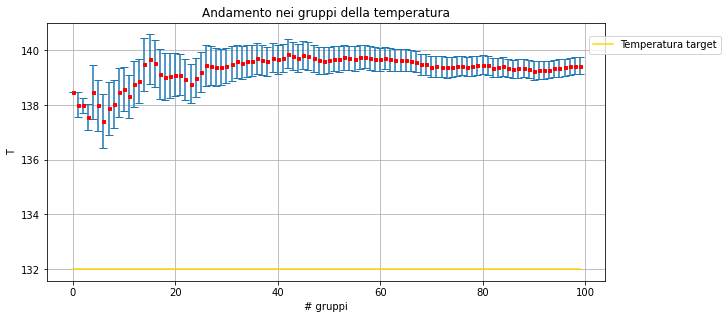

Temperatura
- valore medio: 139.43
- errore:       0.31


In [22]:

AvTemp_liq= numpy.zeros( numpy.size(Temp_liq) )
dev_AvTemp_liq= numpy.zeros( numpy.size(Temp_liq) )

for i in range( numpy.size(Temp_liq) ):
    AvTemp_liq[i]= Media (Temp_liq, i)
    dev_AvTemp_liq[i]= Err (Temp_liq, i)  

plt.figure(figsize=(10, 4.75))
plt.plot ( 1.1*e_k+numpy.zeros(100), label= "Temperatura target", color= "gold")
plt.errorbar( N, AvTemp_liq, yerr= dev_AvTemp_liq, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3, 
              linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel('T')
plt.title("Andamento nei gruppi della temperatura")
plt.legend(bbox_to_anchor=(.97, .95), loc='upper left', borderaxespad=0.)
plt.grid(True)

plt.show()

print("Temperatura")
print("- valore medio:", round(AvTemp_liq[numpy.size(AvTemp_liq)-1],2))
print("- errore:      ", round(dev_AvTemp_liq[numpy.size(AvTemp_liq)-1],2))


##### stato gassoso:
Si importano i blocchi riguardanti la simulazione dell'Argon allo stato di gas e si convertono le grandezze in unità dell'SI.

In [23]:

K_gas, P_gas, Etot_gas, Temp_gas= numpy.loadtxt( "4.3 (Argon)/ave_gas_out.txt", usecols= (0,1,2,3), 
                                                 delimiter= "\t", unpack= 'true' )

Temp_gas= Temp_gas*e_k
K_gas= K_gas*e
P_gas= P_gas*e
Etot_gas= Etot_gas*e


Si produce un grafico dell'andamento all'aumentare del numero di blocchi utilizzati del valor medio delle osservabili e dell'errore associato (sotto forma di deviazione standard della media).

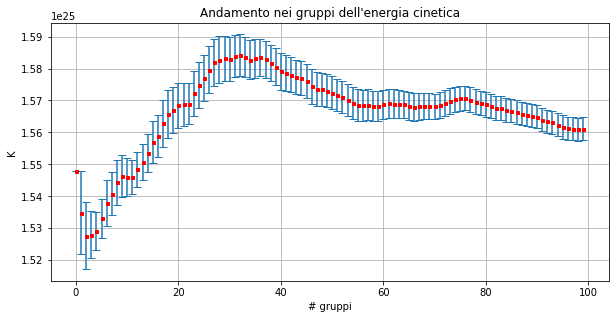

Energia Cinetica
- valore medio: 1.5610330967537725e+25
- errore:       3.6258662856358873e+22


In [24]:

AvK_gas= numpy.zeros( numpy.size(K_gas) )
dev_AvK_gas= numpy.zeros( numpy.size(K_gas) )

for i in range( numpy.size(K_gas) ):
    AvK_gas[i]= Media (K_gas, i)
    dev_AvK_gas[i]= Err (K_gas, i)
    
N = numpy.arange ( numpy.size(AvK_gas) )   

plt.figure(figsize=(10, 4.75))
plt.errorbar( N, AvK_gas, yerr= dev_AvK_gas, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3, 
              linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel('K')
plt.title("Andamento nei gruppi dell'energia cinetica")
plt.grid(True)

plt.show()

print("Energia Cinetica")
print("- valore medio:", AvK_gas[numpy.size(AvK_gas)-1])
print("- errore:      ", dev_AvK_gas[numpy.size(AvK_gas)-1])


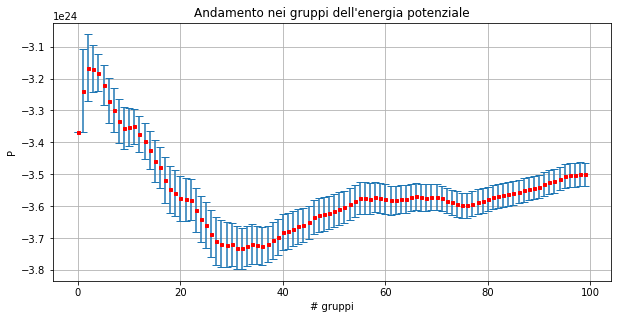

Energia Potenziale
- valore medio: -3.500620823974811e+24
- errore:       3.6271339105559496e+22


In [25]:

AvP_gas= numpy.zeros( numpy.size(P_gas) )
dev_AvP_gas= numpy.zeros( numpy.size(P_gas) )

for i in range( numpy.size(P_gas) ):
    AvP_gas[i]= Media (P_gas, i)
    dev_AvP_gas[i]= Err (P_gas, i)

plt.figure(figsize=(10, 4.75))
plt.errorbar( N, AvP_gas, yerr= dev_AvP_gas, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3, 
              linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel('P')
plt.title("Andamento nei gruppi dell'energia potenziale")
plt.grid(True)

plt.show()

print("Energia Potenziale")
print("- valore medio:", AvP_gas[numpy.size(AvP_gas)-1])
print("- errore:      ", dev_AvP_gas[numpy.size(AvP_gas)-1])


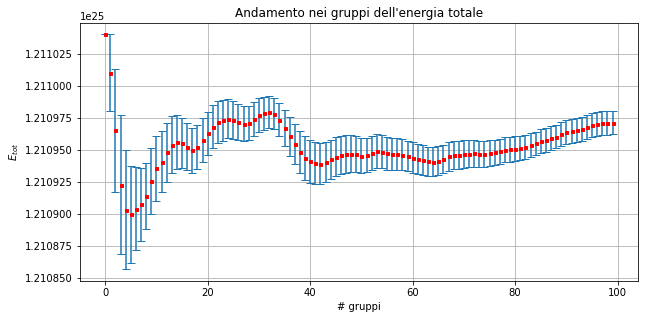

Energia Totale
- valore medio: 1.2109710491225502e+25
- errore:       8.94371507785152e+19


In [26]:

AvEtot_gas= numpy.zeros( numpy.size(Etot_gas) )
dev_AvEtot_gas= numpy.zeros( numpy.size(Etot_gas) )

for i in range( numpy.size(Etot_gas) ):
    AvEtot_gas[i]= Media (Etot_gas, i)
    dev_AvEtot_gas[i]= Err (Etot_gas, i)

plt.figure(figsize=(10, 4.75))
plt.errorbar( N, AvEtot_gas, yerr= dev_AvEtot_gas, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3,  
              linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel('$E_{tot}$')
plt.title("Andamento nei gruppi dell'energia totale")
plt.grid(True)

plt.show()

print("Energia Totale")
print("- valore medio:", AvEtot_gas[numpy.size(AvEtot_gas)-1])
print("- errore:      ", dev_AvEtot_gas[numpy.size(AvEtot_gas)-1])


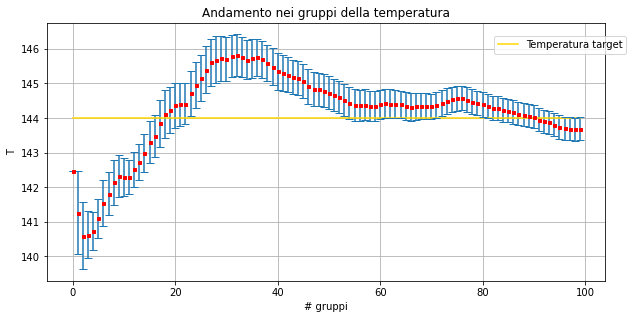

Temperatura
- valore medio: 143.68
- errore:       0.33


In [27]:

AvTemp_gas= numpy.zeros( numpy.size(Temp_gas) )
dev_AvTemp_gas= numpy.zeros( numpy.size(Temp_gas) )

for i in range( numpy.size(Temp_gas) ):
    AvTemp_gas[i]= Media (Temp_gas, i)
    dev_AvTemp_gas[i]= Err (Temp_gas, i)  

plt.figure(figsize=(10, 4.75))
plt.plot ( 1.2*e_k+numpy.zeros(100), label= "Temperatura target", color= "gold")
plt.errorbar( N, AvTemp_gas, yerr= dev_AvTemp_gas, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3, 
              linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel('T')
plt.title("Andamento nei gruppi della temperatura")
plt.legend(bbox_to_anchor=(.8, .95), loc='upper left', borderaxespad=0.)
plt.grid(True)

plt.show()

print("Temperatura")
print("- valore medio:", round(AvTemp_gas[numpy.size(AvTemp_gas)-1],2))
print("- errore:      ", round(dev_AvTemp_gas[numpy.size(AvTemp_gas)-1],2))


Ci si concentri in particolare sui grafici delle temperature.\
Essi convergono ad un valore stabile, con un errore associato che diminuisce nel numero di blocchi considerati, tuttavia non vi è un accoppiamento con la temperatura target desiderata della simulazione (non ci si faccia eccessivamente ingannare dalla unità SI utilizzate). Ciò ovviamente significa che si è simulato il sistema con un bias più o meno influente.\
In particolare però è interessante comprendere da cosa è dettato tale scompenso.\
Si ritiene che esso sia dovuto alle complicanze intrinseche dell'algoritmo di simulazione di MD. Infatti avendo necessità di costruire una partenza adeguata e di effettuare una termalizzazione, piccoli errori e fluttuazioni statistiche nel momento in cui si decide di riscalare le velocità comportano ogni volta un periodo di lunghezza variabile di riassestamento delle osservabili. Ciò comporta lungo la simulazione lo scompenso osservato.

Ci si concentri, infine, sui grafici dello stato gassoso.\
Le condizioni di simulazione desiderate sono, anzitutto, assai prossime al passaggio di stato, ciò implica che ogni minima variazione da tali condizioni può comportare un passaggio di stato. Inoltre, per caratteristiche intrinseche dello stato considerato (interazioni tra particelle rade, espansione al massimo volume possibile,...) sono presenti nella simulazione di tale stato importanti fluttuazioni periodiche di durata elevata (maggiore della lunghezza di simulazione), che complessivamente possono anche annullarsi, ma in una sezione ridotta come la simulazione che si desidera appaiono sospetti/anomali. Ciò si osserva in tutti i grafici riportati, in particolare in quello della temperatura, ove si ha a disposizione un target di riferimento, si osserva concretamente la lunghezza delle oscillazioni descritte e la loro durata, oltre a supportare l'idea che esse nei lunghi periodi si compensino, ma in sezioni limitate appaiano anomale.